### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clean dataset
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz
...,...,...,...,...,...,...,...,...,...,...,...
3268693,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,Normal,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...,blitz
3268694,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,Time forfeit,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,blitz
3268695,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,Time forfeit,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,blitz
3268696,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,Normal,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,blitz


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {
    "1-0": 1,
    "0-1": 0,
    "1/2-1/2": 0.5,
}
df["ResultNumeric"] = df["Result"].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {"blitz": 0, "rapid": 1, "classical": 2}
df["EventTypeID"] = df["EventType"].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz,1.0,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz,0.5,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz,0.5,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz,1.0,0
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz,0.0,0
5,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,Time forfeit,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,blitz,0.0,0
6,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,Normal,e3 d6 d4 g6 Nf3 Bg7 c4 Nf6 Nc3 O-O Be2 Bf5 Nd2...,blitz,0.5,0
7,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,Normal,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,blitz,1.0,0
8,Rated Blitz game,2024.01.01,MadderRose,Philidor23,1-0,B38,2538,2430,Normal,c4 c5 Nf3 g6 e4 Bg7 d4 cxd4 Nxd4 Nc6 Be3 d6 Nc...,blitz,1.0,0
9,Rated Blitz game,2024.01.01,MassterofMayhem,Pliukha_Mikhail,1-0,B01,2604,2727,Normal,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Bg4 d4 Bxe2 Ngxe2...,blitz,1.0,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 3,268,698
Total features: 13

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 52,138
Unique players (Black): 52,001
Unique ECO codes: 497


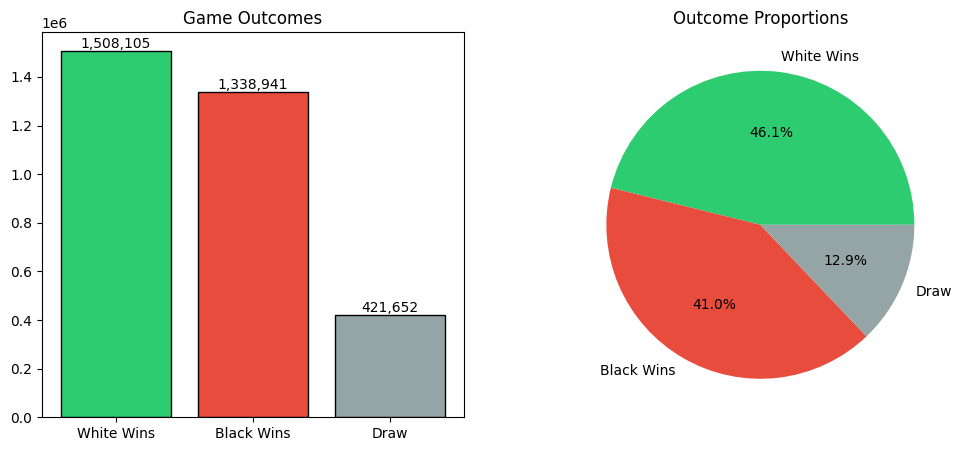

In [6]:
# Count results
counts = df["Result"].value_counts()
labels = ["White Wins", "Black Wins", "Draw"]
colors = ["#2ecc71", "#e74c3c", "#95a5a6"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
axes[0].bar(labels, counts.values, color=colors, edgecolor="black")
axes[0].set_title("Game Outcomes")
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f"{v:,}", ha="center", va="bottom")

# Pie chart
axes[1].pie(counts.values, labels=labels, autopct="%1.1f%%", colors=colors)
axes[1].set_title("Outcome Proportions")

plt.show()

#### Event type

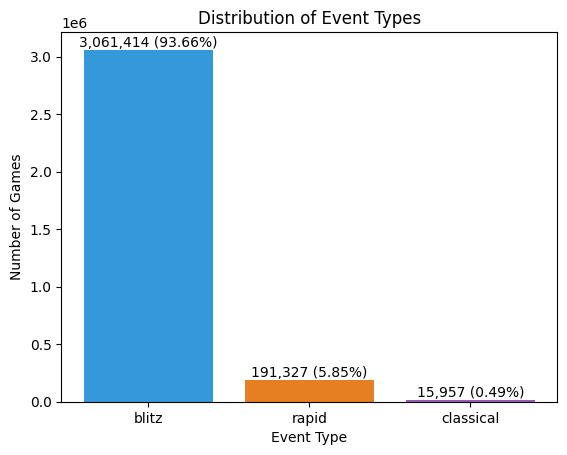

In [7]:
event_counts = df["EventType"].value_counts()
event_pcts = df["EventType"].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(
    event_counts.index, event_counts.values, color=["#3498db", "#e67e22", "#9b59b6"]
)

plt.xlabel("Event Type")
plt.ylabel("Number of Games")
plt.title("Distribution of Event Types")

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center",
        va="bottom",
    )

plt.show()

#### Elo rating 

/tmp/ipykernel_11231/514932698.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["White Elo", "Black Elo"])


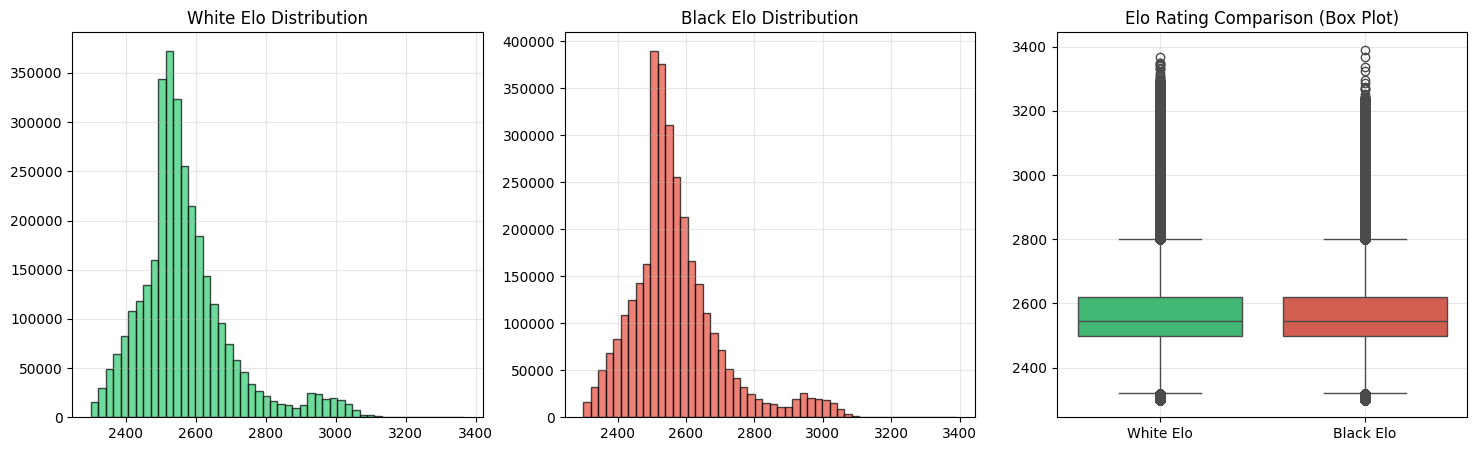

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df["WhiteElo"], bins=50, color="#2ecc71", alpha=0.7, edgecolor="black")
axes[0].set_title("White Elo Distribution")
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df["BlackElo"], bins=50, color="#e74c3c", alpha=0.7, edgecolor="black")
axes[1].set_title("Black Elo Distribution")
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(
    data=[df["WhiteElo"], df["BlackElo"]], palette=["#2ecc71", "#e74c3c"], ax=axes[2]
)
axes[2].set_xticklabels(["White Elo", "Black Elo"])
axes[2].set_title("Elo Rating Comparison (Box Plot)")
axes[2].grid(alpha=0.3)

plt.show()

#### ECO / Opening


Top 20 Most Common Openings:
   1. A45: 80,661 (2.47%)
   2. A00: 78,160 (2.39%)
   3. D02: 69,131 (2.11%)
   4. B00: 67,009 (2.05%)
   5. B12: 64,921 (1.99%)
   6. A05: 64,559 (1.98%)
   7. A40: 63,457 (1.94%)
   8. A04: 60,760 (1.86%)
   9. B06: 58,829 (1.80%)
  10. B40: 57,654 (1.76%)
  11. B01: 53,818 (1.65%)
  12. A01: 50,166 (1.53%)
  13. D00: 48,325 (1.48%)
  14. A46: 47,911 (1.47%)
  15. C00: 47,810 (1.46%)
  16. B10: 46,737 (1.43%)
  17. B23: 45,166 (1.38%)
  18. B90: 42,925 (1.31%)
  19. B22: 42,109 (1.29%)
  20. B30: 40,051 (1.23%)

Top 20 ECO codes coverage: 34.58% of all games


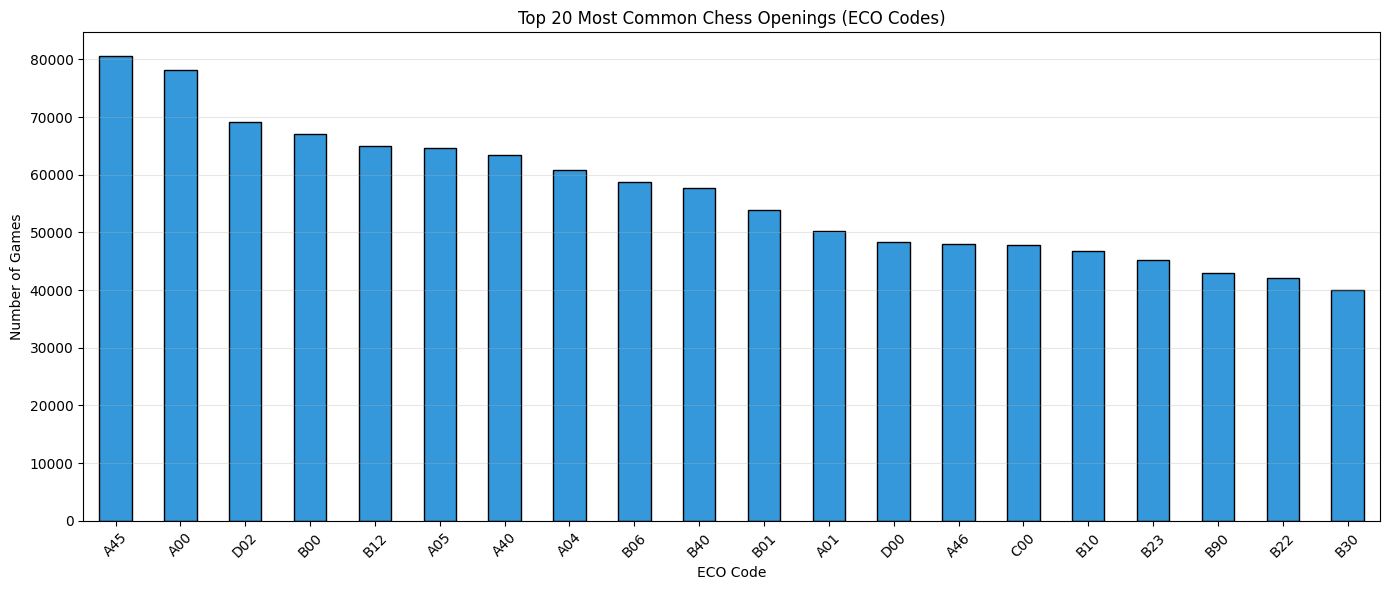

In [9]:
print("\nTop 20 Most Common Openings:")
top_20_display = df["ECO"].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind="bar", color="#3498db", edgecolor="black")
plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.title("Top 20 Most Common Chess Openings (ECO Codes)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### Initial correlation

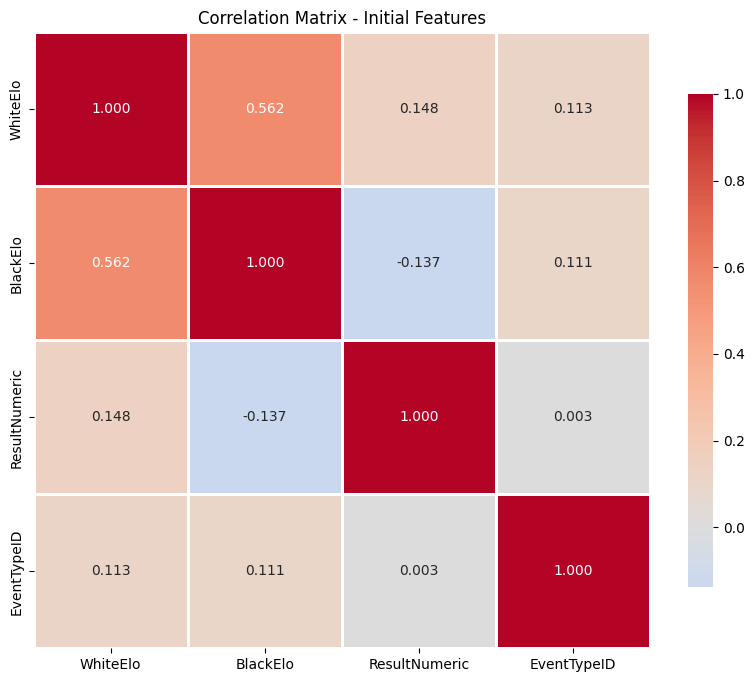

In [10]:
numeric_cols = ["WhiteElo", "BlackElo", "ResultNumeric", "EventTypeID"]
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix - Initial Features")

plt.show()

#### Result by event type

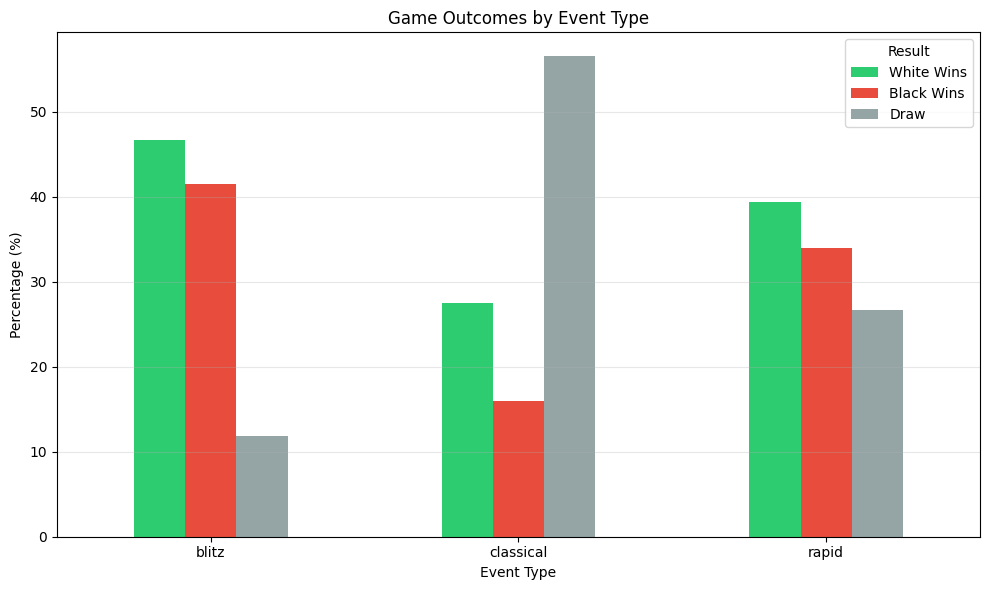

In [11]:
result_by_event = pd.crosstab(df["EventType"], df["Result"], normalize="index") * 100
result_by_event = result_by_event[["1-0", "0-1", "1/2-1/2"]]
result_by_event.columns = ["White Wins", "Black Wins", "Draw"]

# Visualization
result_by_event.plot(
    kind="bar", stacked=False, figsize=(10, 6), color=["#2ecc71", "#e74c3c", "#95a5a6"]
)

plt.xlabel("Event Type")
plt.ylabel("Percentage (%)")
plt.title("Game Outcomes by Event Type")
plt.legend(title="Result", labels=["White Wins", "Black Wins", "Draw"])
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df["RatingDiff"] = np.abs(df["WhiteElo"] - df["BlackElo"])

# Average rating
df["AvgRating"] = (df["WhiteElo"] + df["BlackElo"]) / 2

# Indicator if White is higher rated (binary)
df["WhiteIsHigherRated"] = (df["WhiteElo"] > df["BlackElo"]).astype(int)

df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz,1.0,0,133,2437.5,1
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz,0.5,0,109,2541.5,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz,0.5,0,6,2918.0,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz,1.0,0,109,2487.5,1
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz,0.0,0,185,2565.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268693,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,Normal,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...,blitz,0.5,0,10,2660.0,1
3268694,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,Time forfeit,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,blitz,1.0,0,88,2493.0,1
3268695,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,Time forfeit,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,blitz,0.0,0,26,2570.0,1
3268696,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,Normal,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...,blitz,1.0,0,115,2455.5,1


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df["ECO"].value_counts().head(20).index.tolist()


# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return "Other"


df["ECOGroup"] = df["ECO"].apply(group_eco)

# Create a mapping for encoding
eco_list = ["Other"] + top_20_eco
df["ECOID"] = df["ECOGroup"].apply(lambda x: eco_list.index(x))
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,ECOGroup,ECOID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz,1.0,0,133,2437.5,1,Other,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz,0.5,0,109,2541.5,0,Other,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz,0.5,0,6,2918.0,0,Other,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz,1.0,0,109,2487.5,1,B40,10
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz,0.0,0,185,2565.5,0,Other,0


### 5. Remove unneeded columns

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time
# Same with 'White' and 'Black', these are just the username so the data is not used
df = df.drop(
    ["Event", "Date", "White", "Black", "Result", "ECO", "EventType", "ECOGroup", "Moves", "Termination"],
    axis=1,
)

### 6. Exported featured data
Final check before export into csv

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268698 entries, 0 to 3268697
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   WhiteElo            int64  
 1   BlackElo            int64  
 2   ResultNumeric       float64
 3   EventTypeID         int64  
 4   RatingDiff          int64  
 5   AvgRating           float64
 6   WhiteIsHigherRated  int64  
 7   ECOID               int64  
dtypes: float64(2), int64(6)
memory usage: 199.5 MB


In [17]:
df.isnull().sum()

WhiteElo              0
BlackElo              0
ResultNumeric         0
EventTypeID           0
RatingDiff            0
AvgRating             0
WhiteIsHigherRated    0
ECOID                 0
dtype: int64

In [18]:
df.to_csv("data/chess_games_feature.csv", index=False)